In [1]:
#The first step is loading our pickel files for dataset

In [2]:
import pickle
import numpy as np
import torch

infile = open("train.pkl",'rb')
dataset = pickle.load(infile)
infile.close()

In [3]:
for img_id in range(dataset.shape[0]):
    dataset[img_id] = (dataset[img_id] - torch.min(dataset[img_id])) / (torch.max(dataset[img_id]) - torch.min(dataset[img_id]))
noisy_dataset = dataset + (15 / 255) * np.random.randn(200*1600,40,40)

In [4]:
training_data = []
for i, img in enumerate(noisy_dataset):
    training_data.append((img[None,:,:], dataset[i,None,:,:]))

In [5]:
train_loader = torch.utils.data.DataLoader(training_data,batch_size=128,shuffle=True)

In [6]:
len(training_data[0][0])

1

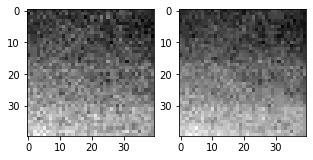

In [7]:
#Now that the dataset is prepared and shuffled, we can call the model function
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for noisy, clean in train_loader:
    plt.subplot(1,2,1)
    plt.imshow(noisy[30,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(clean[30,0], cmap='gray')
    break

In [10]:
import import_ipynb


In [11]:
import DnCNN_IVP

importing Jupyter notebook from DnCNN_IVP.ipynb


In [12]:
#Now that it is imported, let us define a device for GPU cuda
device=torch.device('cuda:0')

In [15]:
N=128
from torch import nn
class loss_new(nn.Module): #N is dataset size
  def __init__(self):
    super(loss_new,self).__init__()
  def forward(self,out,y,x):
    return torch.norm(out-(y-x))/(2*N) #Where does N get defined?

In [16]:
import torch
from torch import optim

In [17]:
criterion=loss_new()

In [18]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [19]:
#Need to set a batch size of 128
#Tensor to data loader
def training_function(net, loader, optim, model_name, epochs=50):
  from tqdm import tqdm
  loss_list=[]
  net.train()
  """
    y is the noisy image and it is used as input

    x is the noiseless image and it is used as a target label
  """
    
  for e in tqdm(range(epochs)): #For each epoch
    train_loss=0
    for i, (noisy, clean) in enumerate(loader):
      optim.zero_grad()#zero grad so they don't stack
      clean = clean.to(device, dtype=torch.float)
      noisy = noisy.to(device, dtype=torch.float)
      prediction = net(noisy)
      batch_loss = criterion(prediction, noisy, clean)
      batch_loss.backward()
      optim.step()
      scheduler.step()
      train_loss += batch_loss.item()

    train_loss = train_loss/len(loader)
    loss_list.append(train_loss)

    print ("Epoch {}: Has a loss of Loss: {:.6f}".format(e+1 ,train_loss))

  torch.save(model.state_dict(), model_name + '_D15.pt')
  return loss_list

In [20]:
from torch.optim.lr_scheduler import StepLR
model=DnCNN_IVP.DnCNN(1,1,15)
device=torch.device('cuda:0')
model.to(device)
epoch = 50

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=1, gamma=0.001**(1/50))
print('beginning with training 15')

plot_me_15_D15=training_function(model, train_loader, optimizer, 'dncnn_noise_15', 50)

beginning with training 15


  2%|▏         | 1/50 [02:31<2:03:30, 151.24s/it]

Epoch 1: Has a loss of Loss: 0.220330


  4%|▍         | 2/50 [05:02<2:00:58, 151.22s/it]

Epoch 2: Has a loss of Loss: 0.171979


  6%|▌         | 3/50 [07:33<1:58:27, 151.22s/it]

Epoch 3: Has a loss of Loss: 0.172254


  8%|▊         | 4/50 [10:04<1:55:56, 151.23s/it]

Epoch 4: Has a loss of Loss: 0.172463


 10%|█         | 5/50 [12:36<1:53:25, 151.23s/it]

Epoch 5: Has a loss of Loss: 0.172662


 12%|█▏        | 6/50 [15:07<1:50:54, 151.25s/it]

Epoch 6: Has a loss of Loss: 0.172758


 14%|█▍        | 7/50 [17:38<1:48:23, 151.24s/it]

Epoch 7: Has a loss of Loss: 0.171930


 16%|█▌        | 8/50 [20:09<1:45:53, 151.26s/it]

Epoch 8: Has a loss of Loss: 0.172189


 18%|█▊        | 9/50 [22:41<1:43:21, 151.26s/it]

Epoch 9: Has a loss of Loss: 0.172691


 20%|██        | 10/50 [25:12<1:40:50, 151.26s/it]

Epoch 10: Has a loss of Loss: 0.172296


 22%|██▏       | 11/50 [27:43<1:38:19, 151.27s/it]

Epoch 11: Has a loss of Loss: 0.172510


 24%|██▍       | 12/50 [30:15<1:35:48, 151.27s/it]

Epoch 12: Has a loss of Loss: 0.172196


 26%|██▌       | 13/50 [32:46<1:33:17, 151.28s/it]

Epoch 13: Has a loss of Loss: 0.172226


 28%|██▊       | 14/50 [35:17<1:30:45, 151.27s/it]

Epoch 14: Has a loss of Loss: 0.172355


 30%|███       | 15/50 [37:48<1:28:15, 151.29s/it]

Epoch 15: Has a loss of Loss: 0.172434


 32%|███▏      | 16/50 [40:20<1:25:43, 151.28s/it]

Epoch 16: Has a loss of Loss: 0.172545


 34%|███▍      | 17/50 [42:51<1:23:12, 151.28s/it]

Epoch 17: Has a loss of Loss: 0.172073


 36%|███▌      | 18/50 [45:22<1:20:41, 151.29s/it]

Epoch 18: Has a loss of Loss: 0.172280


 38%|███▊      | 19/50 [47:54<1:18:10, 151.30s/it]

Epoch 19: Has a loss of Loss: 0.172631


 40%|████      | 20/50 [50:25<1:15:39, 151.30s/it]

Epoch 20: Has a loss of Loss: 0.172068


 42%|████▏     | 21/50 [52:56<1:13:07, 151.29s/it]

Epoch 21: Has a loss of Loss: 0.172498


 44%|████▍     | 22/50 [55:27<1:10:36, 151.30s/it]

Epoch 22: Has a loss of Loss: 0.172663


 46%|████▌     | 23/50 [57:59<1:08:04, 151.29s/it]

Epoch 23: Has a loss of Loss: 0.172356


 48%|████▊     | 24/50 [1:00:30<1:05:33, 151.29s/it]

Epoch 24: Has a loss of Loss: 0.172753


 50%|█████     | 25/50 [1:03:01<1:03:02, 151.29s/it]

Epoch 25: Has a loss of Loss: 0.172428


 52%|█████▏    | 26/50 [1:05:33<1:00:31, 151.29s/it]

Epoch 26: Has a loss of Loss: 0.172432


 54%|█████▍    | 27/50 [1:08:04<57:59, 151.30s/it]  

Epoch 27: Has a loss of Loss: 0.172851


 56%|█████▌    | 28/50 [1:10:35<55:28, 151.29s/it]

Epoch 28: Has a loss of Loss: 0.171253


 58%|█████▊    | 29/50 [1:13:07<52:57, 151.30s/it]

Epoch 29: Has a loss of Loss: 0.171986


 60%|██████    | 30/50 [1:15:38<50:25, 151.29s/it]

Epoch 30: Has a loss of Loss: 0.172497


 62%|██████▏   | 31/50 [1:18:09<47:54, 151.29s/it]

Epoch 31: Has a loss of Loss: 0.173006


 64%|██████▍   | 32/50 [1:20:40<45:23, 151.29s/it]

Epoch 32: Has a loss of Loss: 0.171940


 66%|██████▌   | 33/50 [1:23:12<42:51, 151.29s/it]

Epoch 33: Has a loss of Loss: 0.171938


 68%|██████▊   | 34/50 [1:25:43<40:20, 151.29s/it]

Epoch 34: Has a loss of Loss: 0.173058


 70%|███████   | 35/50 [1:28:14<37:49, 151.28s/it]

Epoch 35: Has a loss of Loss: 0.172269


 72%|███████▏  | 36/50 [1:30:46<35:18, 151.29s/it]

Epoch 36: Has a loss of Loss: 0.173072


 74%|███████▍  | 37/50 [1:33:17<32:46, 151.28s/it]

Epoch 37: Has a loss of Loss: 0.172136


 76%|███████▌  | 38/50 [1:35:48<30:15, 151.28s/it]

Epoch 38: Has a loss of Loss: 0.171842


 78%|███████▊  | 39/50 [1:38:19<27:44, 151.28s/it]

Epoch 39: Has a loss of Loss: 0.172431


 80%|████████  | 40/50 [1:40:51<25:12, 151.27s/it]

Epoch 40: Has a loss of Loss: 0.172684


 82%|████████▏ | 41/50 [1:43:22<22:41, 151.27s/it]

Epoch 41: Has a loss of Loss: 0.172941


 84%|████████▍ | 42/50 [1:45:53<20:10, 151.27s/it]

Epoch 42: Has a loss of Loss: 0.172538


 86%|████████▌ | 43/50 [1:48:24<17:38, 151.28s/it]

Epoch 43: Has a loss of Loss: 0.172470


 88%|████████▊ | 44/50 [1:50:56<15:07, 151.28s/it]

Epoch 44: Has a loss of Loss: 0.172279


 90%|█████████ | 45/50 [1:53:27<12:36, 151.29s/it]

Epoch 45: Has a loss of Loss: 0.172403


 92%|█████████▏| 46/50 [1:55:58<10:05, 151.28s/it]

Epoch 46: Has a loss of Loss: 0.172573


 94%|█████████▍| 47/50 [1:58:30<07:33, 151.28s/it]

Epoch 47: Has a loss of Loss: 0.171895


 96%|█████████▌| 48/50 [2:01:01<05:02, 151.31s/it]

Epoch 48: Has a loss of Loss: 0.172703


 98%|█████████▊| 49/50 [2:03:32<02:31, 151.30s/it]

Epoch 49: Has a loss of Loss: 0.172878


100%|██████████| 50/50 [2:06:04<00:00, 151.28s/it]

Epoch 50: Has a loss of Loss: 0.172212


In [21]:
with open('training_loss_noise_15_D15.txt', 'w') as f:
    f.writelines([str(loss) + '\n' for loss in plot_me_15_D15])